In [36]:
# Shadia's blank canvas

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

covid_clean_CA_TX = "../Resources/covid_clean_CA_TX.csv"
CA_county_landsize = "../Resources/CA_county_landsize.csv"
TX_county_landsize = "../Resources/TX_county_landsize.csv"


In [37]:
covid_clean_CA_TX_df = pd.read_csv(covid_clean_CA_TX, encoding="ISO-8859-1")
covid_clean_CA_TX_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144


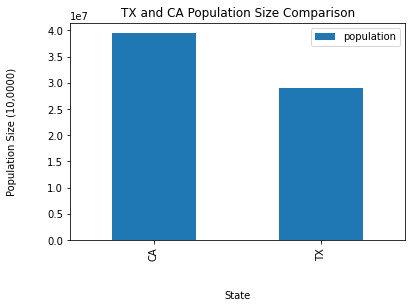

In [38]:
covid_clean_CA_TX_pop_df = covid_clean_CA_TX_df[["State", "population"]]
covid_clean_CA_TX_pop_df = covid_clean_CA_TX_pop_df.groupby("State").sum()
covid_clean_CA_TX_pop_df.plot(kind="bar")

plt.title("TX and CA Population Size Comparison")
plt.xlabel("State", labelpad=30)
plt.ylabel("Population Size (10,0000)", labelpad=30)

plt.savefig("../Images/TX_CA_Pop_png")

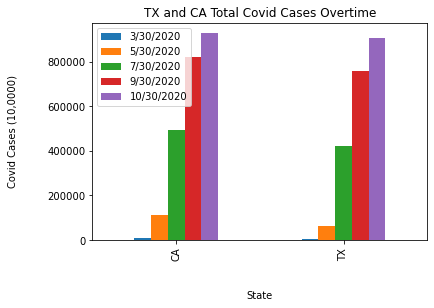

In [39]:
covid_clean_CA_TX_cov_df = covid_clean_CA_TX_df[["State","3/30/2020","5/30/2020","7/30/2020","9/30/2020","10/30/2020"]]
covid_clean_CA_TX_cov_df = covid_clean_CA_TX_cov_df.groupby("State").sum()
covid_clean_CA_TX_cov_df.plot(kind="bar")

plt.title("TX and CA Total Covid Cases Overtime")
plt.xlabel("State", labelpad=30)
plt.ylabel("Covid Cases (10,0000)", labelpad=30)

plt.savefig("../Images/TX_CA_cov_png")

In [40]:
covid_clean_CA_df = covid_clean_CA_TX_df.loc[covid_clean_CA_TX_df["State"]=="CA",:]
covid_clean_CA_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144


In [41]:
covid_clean_TX_df = covid_clean_CA_TX_df.loc[covid_clean_CA_TX_df["State"]=="TX",:]
covid_clean_TX_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
59,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2922,2934,2935,2941,2941,2946,2949,2961,2970,2970
60,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,567,567,567,584,584,584,628,628,655,667
61,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2277,2277,2277,2277,2304,2304,2317,2317
62,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,340,340,345,346,348,348,349,350,350,351
63,TX,48009,Archer County,8553,48,0,0,0,0,0,...,133,133,136,137,137,137,142,154,160,161


In [42]:
CA_county_landsize_df = pd.read_csv(CA_county_landsize, encoding="ISO-8859-1")
CA_county_landsize_df = CA_county_landsize_df.rename(columns={"ï»¿Land Area": "Land Area"})
CA_total_area = CA_county_landsize_df["Land Area"].sum()
CA_total_area
# CA_county_landsize_df.head()

155779.09

In [43]:
TX_county_landsize_df = pd.read_csv(TX_county_landsize, encoding="ISO-8859-1")
TX_county_landsize_df = TX_county_landsize_df.rename(columns={"ï»¿Land Area": "Land Area"})
TX_total_area = TX_county_landsize_df["Land Area"].sum()
TX_total_area
# TX_county_landsize_df.head()

261267.4

In [44]:
final_TX_pd = pd.merge(covid_clean_TX_df, TX_county_landsize_df, how="left", on=["County Name"])
final_TX_pd = final_TX_pd.dropna()
final_TX_pd["Population Density"]=""
final_TX_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density
0,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2935,2941,2941,2946,2949,2961,2970,2970,1062.6,
1,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,567,584,584,584,628,628,655,667,1500.7,
2,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2277,2277,2304,2304,2317,2317,797.8,
3,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,345,346,348,348,349,350,350,351,252.1,
4,TX,48009,Archer County,8553,48,0,0,0,0,0,...,136,137,137,137,142,154,160,161,903.3,


In [45]:
final_TX_pd_pop_tot = final_TX_pd[["population","Land Area"]].sum()
final_TX_pd_pop_tot

population    28995881.0
Land Area       261267.4
dtype: float64

In [46]:
final_CA_pd = pd.merge(covid_clean_CA_df, CA_county_landsize_df, how="left", on=["County Name"])
final_CA_pd = final_CA_pd.dropna()
# Calculating populatin density
final_CA_pd["Population Density"]= ""
final_CA_pd["Population Density"]= final_CA_pd['population']/final_CA_pd['Land Area']
# Calculating Covid Per Capita
final_CA_pd["Covid Per Capita"]= ""
final_CA_pd["Covid Per Capita"]= final_CA_pd['10/30/2020']/final_CA_pd['population']
# Calculating Covid per Capity by 100 people
final_CA_pd["Covid Per Capita by 100"]= ""
final_CA_pd["Covid Per Capita by 100"]= final_CA_pd['Covid Per Capita']*100

final_CA_pd.sort_values("Population Density", ascending=False)
final_CA_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density,Covid Per Capita,Covid Per Capita by 100
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,23312,23391,23391,23576,23636,23775,739.02,2261.547725,0.014225,1.422521
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,738.33,1.529127,0.002657,0.265722
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,291,299,301,302,308,311,594.58,66.857277,0.007824,0.782351
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3047,3073,3073,3113,3127,3144,1636.46,133.939112,0.014344,1.434398
5,CA,6009,Calaveras County,45905,6,0,0,0,0,0,...,342,342,342,347,347,354,1020.01,45.004461,0.007712,0.771158


In [47]:
final_CA_pd_pop_tot = final_CA_pd[["population","Land Area"]].sum()
final_CA_pd_pop_tot

population    37332138.00
Land Area       135722.17
dtype: float64

In [48]:
final_TX_pd = pd.merge(covid_clean_TX_df, TX_county_landsize_df, how="left", on=["County Name"])
final_TX_pd = final_TX_pd.dropna()
# Calculating populatin density
final_TX_pd["Population Density"]= ""
final_TX_pd["Population Density"]= final_TX_pd['population']/final_TX_pd['Land Area']
# Calculating Covid Per Capita
final_TX_pd["Covid Per Capita"]= ""
final_TX_pd["Covid Per Capita"]= final_TX_pd['10/30/2020']/final_TX_pd['population']
# Calculating Covid per Capity by 100 people
final_TX_pd["Covid Per Capita by 100"]= ""
final_TX_pd["Covid Per Capita by 100"]= final_TX_pd['Covid Per Capita']*100

final_TX_pd.sort_values("Population Density", ascending=False)
final_TX_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density,Covid Per Capita,Covid Per Capita by 100
0,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2941,2946,2949,2961,2970,2970,1062.6,54.333710,0.051442,5.144193
1,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,584,584,628,628,655,667,1500.7,12.464183,0.035659,3.565891
2,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2304,2304,2317,2317,797.8,108.692655,0.026720,2.671971
3,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,348,348,349,350,350,351,252.1,93.256644,0.014930,1.492982
4,TX,48009,Archer County,8553,48,0,0,0,0,0,...,137,137,142,154,160,161,903.3,9.468615,0.018824,1.882380


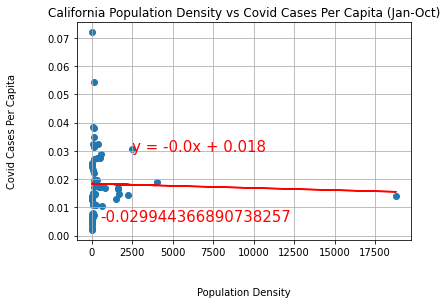

-0.029944366890738257
y = -0.0x + 0.018


<Figure size 432x288 with 0 Axes>

In [49]:
x_values = final_CA_pd["Population Density"]
y_values = final_CA_pd["Covid Per Capita"]

plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2500,0.03),fontsize=15,color="red")
plt.annotate(rvalue,(500,0.005),fontsize=15,color="red")
plt.title("California Population Density vs Covid Cases Per Capita (Jan-Oct)")
plt.xlabel("Population Density", labelpad=30)
plt.ylabel("Covid Cases Per Capita", labelpad=30)
plt.grid(True)
plt.show()
plt.savefig("../Images/CAPop_Density_vs_Covid_Cases.png")
print(rvalue)
print(line_eq)

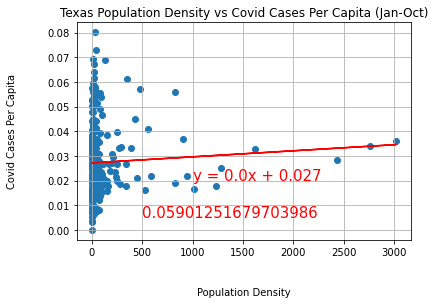

0.05901251679703986
y = 0.0x + 0.027


<Figure size 432x288 with 0 Axes>

In [53]:
x_values = final_TX_pd["Population Density"]
y_values = final_TX_pd["Covid Per Capita"]

plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(rvalue,(500,0.005),fontsize=15,color="red")
plt.annotate(line_eq,(1000,0.02),fontsize=15,color="red")
plt.title("Texas Population Density vs Covid Cases Per Capita (Jan-Oct)")
plt.xlabel("Population Density", labelpad=30)
plt.ylabel("Covid Cases Per Capita", labelpad=30)
plt.grid(True)
plt.show()
plt.savefig("../Images/TXPop_Density_vs_Covid_Cases.png")
print(rvalue)
print(line_eq)

In [120]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_CA_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_CA_bins_pd = final_CA_pd.dropna()
final_CA_bins_per_pd = final_CA_bins_pd[["Population Bins", "Covid Per Capita"]] 
final_CA_bins_per_pd = final_CA_bins_per_pd.groupby("Population Bins").mean()
final_CA_bins_per_pd = final_CA_bins_per_pd.rename(columns={"Covid Per Capita": "CA Covid Per Capita"})
final_CA_bins_per_pd

,CA Covid Per Capita
Population Bins,
100-4999,0.002327
5000-24999,0.009843
25000-49999,0.012788
50000-249999,0.019744
250000-499999,0.022315
500000-749999,0.032456
750000-1249999,0.022973
12500000-11000000,0.019678


In [121]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_CA_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_CA_bins_pd = final_CA_pd.dropna()
final_CA_bins_pd
final_CA_bins_100_pd = final_CA_bins_pd[["Population Bins", "Covid Per Capita by 100"]] 
final_CA_bins_100_pd = final_CA_bins_100_pd.groupby("Population Bins").mean()
final_CA_bins_100_pd= final_CA_bins_100_pd.rename(columns={"Covid Per Capita by 100": "CA Covid Per Capita by 100"})
final_CA_bins_100_pd

,CA Covid Per Capita by 100
Population Bins,
100-4999,0.232695
5000-24999,0.984314
25000-49999,1.278768
50000-249999,1.974381
250000-499999,2.231524
500000-749999,3.245560
750000-1249999,2.297344
12500000-11000000,1.967760


In [122]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_CA_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_CA_bins_den_pd = final_CA_pd.dropna()
final_CA_bins_den_pd = final_CA_bins_den_pd[["Population Bins", "Population Density"]] 
final_CA_bins_den_pd = final_CA_bins_den_pd.groupby("Population Bins").mean()
final_CA_bins_den_pd = final_CA_bins_den_pd.rename(columns={"Population Density": "CA Population Density"})
final_CA_bins_den_pd

,CA Population Density
Population Bins,
100-4999,2.340816
5000-24999,7.227840
25000-49999,29.129047
50000-249999,89.319518
250000-499999,287.424016
500000-749999,368.376337
750000-1249999,3344.901333
12500000-11000000,1856.027945


In [133]:
bibins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_TX_pd["Population Bins"] = pd.cut(final_TX_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_TX_bins_pd = final_TX_pd.dropna()
final_TX_bins_per_pd = final_TX_bins_pd[["Population Bins", "Covid Per Capita"]]
final_TX_bins_per_pd = final_TX_bins_per_pd.groupby("Population Bins").mean()
final_TX_bins_per_pd = final_TX_bins_per_pd.rename(columns={"Covid Per Capita": "TX Covid Per Capita"})
final_TX_bins_per_pd

,TX Covid Per Capita
Population Bins,
100-4999,0.021424
5000-24999,0.028786
25000-49999,0.028342
50000-249999,0.027273
250000-499999,0.042225
500000-749999,0.019053
750000-1249999,0.030647
12500000-11000000,0.031310


In [134]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_TX_pd["Population Bins"] = pd.cut(final_TX_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_TX_bins_pd = final_TX_pd.dropna()
final_TX_bins_100_pd = final_TX_bins_pd[["Population Bins", "Covid Per Capita by 100"]]
final_TX_bins_100_pd = final_TX_bins_100_pd.groupby("Population Bins").mean()
final_TX_bins_100_pd = final_TX_bins_100_pd.rename(columns={"Covid Per Capita by 100": "TX Covid Per Capita by 100"})
final_TX_bins_100_pd

,TX Covid Per Capita by 100
Population Bins,
100-4999,2.142403
5000-24999,2.878585
25000-49999,2.834231
50000-249999,2.727281
250000-499999,4.222548
500000-749999,1.905340
750000-1249999,3.064687
12500000-11000000,3.131013


In [135]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000, 11000000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1249999", "12500000-11000000"]

final_TX_pd["Population Bins"] = pd.cut(final_TX_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_TX_bins_den_pd = final_TX_pd.dropna()
final_TX_bins_den_pd = final_TX_bins_den_pd[["Population Bins", "Population Density"]] 
final_TX_bins_den_pd = final_TX_bins_den_pd.groupby("Population Bins").mean()
final_TX_bins_den_pd = final_TX_bins_den_pd.rename(columns={"Population Density": "TX Population Density"})
final_TX_bins_den_pd

,TX Population Density
Population Bins,
100-4999,2.467497
5000-24999,17.500217
25000-49999,44.825403
50000-249999,149.415162
250000-499999,376.834516
500000-749999,556.072902
750000-1249999,912.625915
12500000-11000000,2221.773157


In [136]:
final_CA_TX_bins_den = pd.concat([final_TX_bins_den_pd,final_CA_bins_den_pd], axis=1)
final_CA_TX_bins_den

,TX Population Density,CA Population Density
Population Bins,,
100-4999,2.467497,2.340816
5000-24999,17.500217,7.227840
25000-49999,44.825403,29.129047
50000-249999,149.415162,89.319518
250000-499999,376.834516,287.424016
500000-749999,556.072902,368.376337
750000-1249999,912.625915,3344.901333
12500000-11000000,2221.773157,1856.027945


In [137]:
final_CA_TX_bins_100_pd = pd.concat([final_TX_bins_100_pd,final_CA_bins_100_pd], axis=1)
final_CA_TX_bins_100_pd

,TX Covid Per Capita by 100,CA Covid Per Capita by 100
Population Bins,,
100-4999,2.142403,0.232695
5000-24999,2.878585,0.984314
25000-49999,2.834231,1.278768
50000-249999,2.727281,1.974381
250000-499999,4.222548,2.231524
500000-749999,1.905340,3.245560
750000-1249999,3.064687,2.297344
12500000-11000000,3.131013,1.967760


In [138]:
final_CA_TX_bins_per_pd = pd.concat([final_TX_bins_per_pd,final_CA_bins_per_pd], axis=1)
final_CA_TX_bins_per_pd

,TX Covid Per Capita,CA Covid Per Capita
Population Bins,,
100-4999,0.021424,0.002327
5000-24999,0.028786,0.009843
25000-49999,0.028342,0.012788
50000-249999,0.027273,0.019744
250000-499999,0.042225,0.022315
500000-749999,0.019053,0.032456
750000-1249999,0.030647,0.022973
12500000-11000000,0.031310,0.019678


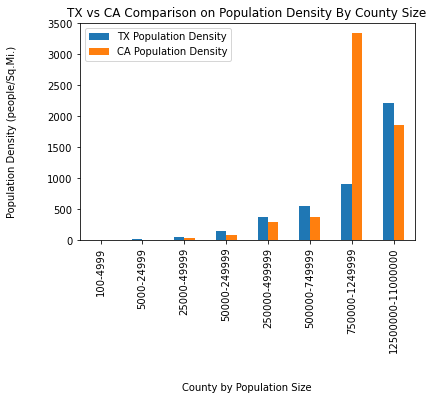

In [139]:
final_CA_TX_bins_den = final_CA_TX_bins_den.plot(kind="bar")
final_CA_TX_bins_den.set_ylabel("Population Density (people/Sq.Mi.)", labelpad=30)
final_CA_TX_bins_den.set_xlabel("County by Population Size", labelpad=30)
final_CA_TX_bins_den.set_title("TX vs CA Comparison on Population Density By County Size")
plt.savefig("../Images/TX_CA_Pop_Density_png")

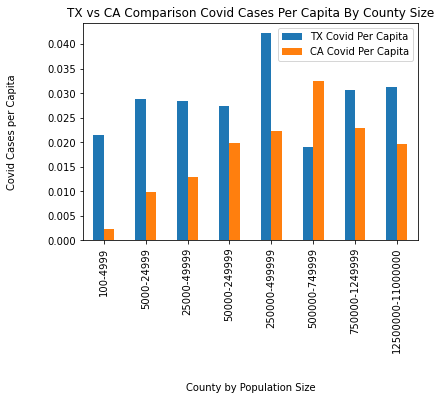

In [130]:
final_CA_TX_bins_per_pd = final_CA_TX_bins_per_pd.plot(kind="bar")
final_CA_TX_bins_per_pd.set_ylabel("Covid19 Cases per Capita", labelpad=30)
final_CA_TX_bins_per_pd.set_xlabel("County by Population Size", labelpad=30)
final_CA_TX_bins_per_pd.set_title("TX vs CA Comparison Covid19 Cases Per Capita By County Size")
plt.savefig("../Images/TX_CA_Covid_per_Capita.png")

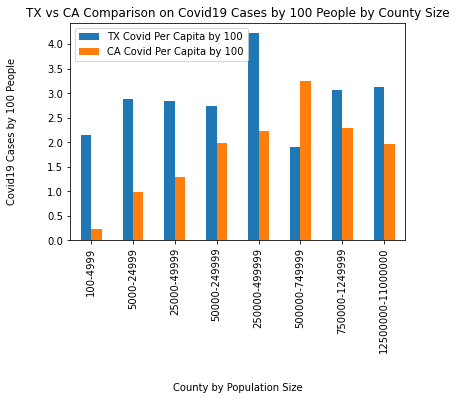

In [140]:
final_CA_TX_bins_100_pd = final_CA_TX_bins_100_pd.plot(kind="bar")
final_CA_TX_bins_100_pd.set_ylabel("Covid19 Cases by 100 People", labelpad=30)
final_CA_TX_bins_100_pd.set_xlabel("County by Population Size", labelpad=30)
final_CA_TX_bins_100_pd.set_title("TX vs CA Comparison on Covid19 Cases by 100 People by County Size")
plt.savefig("../Images/TX_CA_Covid_by_100.png")